In [34]:
import os
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
files = os.listdir('../final_stats/preprocessed_3/')
files[:2]

['preprocessed_no_sent_last_1.csv', 'preprocessed_no_sent_last_3.csv']

In [3]:
def split_target(df, target_col='away_winner_wts'):
    df = df.copy()
    target = df.pop(target_col)
    return df, target

def normalize_df(df):
    scaler = StandardScaler()
    data, target = split_target(df)
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return data, target

def get_data(file):
    df = pd.read_csv(f'../final_stats/preprocessed_3/{file}', index_col=[0])
    data, target = normalize_df(df)
    return data, target


In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 8)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(30, 100, num = 8)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 8, 10, 12, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 8, 10, 12, 15]
# Method of selecting samples for training each tree
bootstrap = [True]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [27]:
print(files[3])
x,y = get_data(files[3])

preprocessed_no_sent_last_7.csv


In [28]:
 #Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1000, cv = 10, verbose=2, random_state=42, n_jobs = -1
)# Fit the random search model
rf_random.fit(x, y)

c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 768 is smaller than n_iter=1000. Running 768 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 768 candidates, totalling 7680 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [30, 40, 50, 60, 70, 80],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 37, 64, 91, 118,
                                                         145, 172, 200]},
                   random_state=42, verbose=2)

### 1st run best parameters and results  
{  
    'n_estimators': 400,  
    'min_samples_split': 10,  
    'min_samples_leaf': 4,  
    'max_features': 'auto',  
    'max_depth': 70,  
    'bootstrap': True  
}  

0.5990909090909091

### 2nd Run Best Params and results
{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 75,
 'bootstrap': True}

0.6272727272727272

### 3rd Run Best Params and Results
{'n_estimators': 64,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

0.6381818181818182

In [31]:
no_sent_files = files[:7]
no_sent_files

['preprocessed_no_sent_last_1.csv',
 'preprocessed_no_sent_last_3.csv',
 'preprocessed_no_sent_last_3_wt.csv',
 'preprocessed_no_sent_last_7.csv',
 'preprocessed_no_sent_last_7_wt.csv',
 'preprocessed_no_sent_last_ssn.csv',
 'preprocessed_no_sent_last_ssn_wt.csv']

In [33]:
random_grid

{'n_estimators': [10, 37, 64, 91, 118, 145, 172, 200],
 'max_features': ['auto'],
 'max_depth': [30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [4, 8, 10, 12, 15],
 'min_samples_leaf': [4, 8, 10, 12, 15],
 'bootstrap': [True]}

In [55]:
param_dict = {
    'n_estimators': [5, 8, 10, 25, 50, 75, 100, 300],
    'max_features': ['auto'],
    'max_depth': [25, 50, 75, 100, 125, 150, 200, 400],
    'min_samples_split': [2, 4, 8, 10, 12, 15],
    'min_samples_leaf': [2, 4, 8, 10, 12, 15],
    'bootstrap': [True]
}

param_dict_test = {
    'n_estimators': [91, 118, ],
    'max_features': ['auto'],
    'max_depth': [50, 60, 70],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [8, 10, 12],
    'bootstrap': [True]
   
}


def grid_search(x, y, params):
    max_score = {
        'scores_mean':0
    }

    all_scores = []

    for n in params['n_estimators']:
        for depth in params['max_depth']:
            for split in params['min_samples_split']:
                for leaf in params['min_samples_leaf']:
                    rf = RandomForestClassifier(
                        n_estimators=n,
                        max_depth=depth,
                        min_samples_split=split,
                        min_samples_leaf=leaf,
                        bootstrap=True,
                        max_features='auto'
                    )

                    cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

                    scores = cross_val_score(
                        rf,
                        x,
                        y,
                        scoring='accuracy',
                        cv=cv,
                        n_jobs=-1
                    )

                    scores_dict = {
                        'scores_mean': scores.mean(),
                        'scores_std': scores.std(),
                        'n_estimators': n,
                        'max_depth': depth,
                        'min_samples_split': split,
                        'min_samples_leaf': leaf,
                        'scores': scores
                    }

                    all_scores.append(scores_dict)
                    if scores.mean() > max_score['scores_mean']:
                        max_score = scores_dict
    return all_scores, max_score

In [44]:
all_scores, max_score = grid_search(x,y, param_dict)

In [45]:
def get_best_params(all_scores):
    ms = max(all_scores, key=lambda x:x['scores_mean'])
    print(f"Accuracy: {round(ms['scores_mean']*100,2)}%")
    print(ms)
    print(f"Best Paramaters: \nn_estimators: {ms['n_estimators']} \t max_depth: {ms['max_depth']} \t min_samples_split: {ms['min_samples_split']} \t min_samples_leaf: {ms['min_samples_leaf']}")

param_dict = {
    'n_estimators': [10, 37, 64, 91, 118, 145, 172, 200],
    'max_features': ['auto'],
    'max_depth': [30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [4, 8, 10, 12, 15],
    'min_samples_leaf': [4, 8, 10, 12, 15],
    'bootstrap': [True]  
}

n_estimators: 10 	 max_depth: 100 	 min_samples_split: 4 	 min_samples_leaf: 4

In [46]:
get_best_params(all_scores)

Accuracy: 53.34%
{'scores_mean': 0.5333636363636363, 'scores_std': 0.14517618250574763, 'n_estimators': 10, 'max_depth': 100, 'min_samples_split': 4, 'min_samples_leaf': 4, 'scores': array([0.54545455, 0.63636364, 0.81818182, 0.72727273, 0.90909091,
       0.6       , 0.4       , 0.6       , 0.4       , 0.5       ,
       0.54545455, 0.63636364, 0.45454545, 0.36363636, 0.45454545,
       0.6       , 0.2       , 0.4       , 0.5       , 0.3       ,
       0.45454545, 0.45454545, 0.54545455, 0.63636364, 0.72727273,
       0.5       , 0.3       , 0.8       , 0.4       , 0.5       ,
       0.63636364, 0.63636364, 0.45454545, 0.54545455, 0.63636364,
       0.6       , 0.2       , 0.7       , 0.4       , 0.4       ,
       0.45454545, 0.45454545, 0.54545455, 0.63636364, 0.54545455,
       0.5       , 0.5       , 0.4       , 0.8       , 0.4       ,
       0.54545455, 0.54545455, 0.72727273, 0.36363636, 0.72727273,
       0.6       , 0.6       , 0.6       , 0.6       , 0.4       ,
       0.7272

In [57]:
param_dict_2 = {
    'n_estimators': [5, 8, 10, 25, 50, 100],
    'max_features': ['auto'],
    'max_depth': [25, 50, 75, 100, 125, 150, 200],
    'min_samples_split': [2, 4, 8, 10, 12, 15],
    'min_samples_leaf': [2, 4, 8, 10, 12, 15],
    'bootstrap': [True]
}

param_dict_3 = {
    'n_estimators': [5, 8, 10, 25, 50, 75, 100, 300],
    'max_features': ['auto'],
    'max_depth': [5, 10, 15, 25, 50, 75, 100, 150, 200],
    'min_samples_split': [2, 4, 8, 10, 12, 15],
    'min_samples_leaf': [2, 4, 8, 10, 12, 15],
    'bootstrap': [True]
}

def all_datasets(files, params):
    results = []
    for f in files:
        x,y = get_data(f)
        all_scores, max_score = grid_search(x, y, params)
        max_score['file'] = f
        results.append(max_score)
    return results



In [49]:
no_sent_files = files[:7]
no_sent_files


['preprocessed_no_sent_last_1.csv',
 'preprocessed_no_sent_last_3.csv',
 'preprocessed_no_sent_last_3_wt.csv',
 'preprocessed_no_sent_last_7.csv',
 'preprocessed_no_sent_last_7_wt.csv',
 'preprocessed_no_sent_last_ssn.csv',
 'preprocessed_no_sent_last_ssn_wt.csv']

In [50]:
no_sent_results = all_datasets(no_sent_files, param_dict_2)

In [58]:
no_sent_results2 = all_datasets(no_sent_files, param_dict_3)

In [59]:
df_no_sent_results2 = pd.DataFrame.from_records(no_sent_results2, index ='file').sort_values('scores_mean', ascending=False)
df_no_sent_results2

,scores_mean,scores_std,n_estimators,max_depth,min_samples_split,min_samples_leaf,scores
file,,,,,,,
preprocessed_no_sent_last_ssn_wt.csv,0.545545,0.146978,5,75,8,4,"[0.6363636363636364, 0.45454545454545453, 0.36..."
preprocessed_no_sent_last_7.csv,0.537364,0.127389,8,150,2,8,"[0.5454545454545454, 0.5454545454545454, 0.636..."
preprocessed_no_sent_last_ssn.csv,0.534909,0.146082,5,50,2,2,"[0.36363636363636365, 0.5454545454545454, 0.63..."
preprocessed_no_sent_last_1.csv,0.533455,0.156722,8,100,4,2,"[0.5454545454545454, 0.45454545454545453, 0.72..."
preprocessed_no_sent_last_7_wt.csv,0.529909,0.133245,10,10,4,4,"[0.45454545454545453, 0.7272727272727273, 0.54..."
preprocessed_no_sent_last_3.csv,0.492636,0.155328,8,100,12,4,"[0.36363636363636365, 0.45454545454545453, 0.6..."
preprocessed_no_sent_last_3_wt.csv,0.490818,0.157373,5,15,8,4,"[0.5454545454545454, 0.45454545454545453, 0.54..."


In [51]:
df_no_sent_results = pd.DataFrame.from_records(no_sent_results, index ='file').sort_values('scores_mean', ascending=False)
df_no_sent_results

,scores_mean,scores_std,n_estimators,max_depth,min_samples_split,min_samples_leaf,scores
file,,,,,,,
preprocessed_no_sent_last_ssn_wt.csv,0.538727,0.158717,5,75,2,2,"[0.2727272727272727, 0.45454545454545453, 0.45..."
preprocessed_no_sent_last_7.csv,0.537909,0.151560,8,50,12,4,"[0.45454545454545453, 0.6363636363636364, 0.54..."
preprocessed_no_sent_last_1.csv,0.537636,0.158015,8,25,2,10,"[0.45454545454545453, 0.36363636363636365, 0.4..."
preprocessed_no_sent_last_ssn.csv,0.536545,0.157144,10,150,4,4,"[0.45454545454545453, 0.36363636363636365, 0.7..."
preprocessed_no_sent_last_7_wt.csv,0.536091,0.143978,5,25,4,4,"[0.6363636363636364, 0.6363636363636364, 0.454..."
preprocessed_no_sent_last_3_wt.csv,0.500545,0.152461,5,75,10,4,"[0.6363636363636364, 0.5454545454545454, 0.454..."
preprocessed_no_sent_last_3.csv,0.486000,0.176483,5,150,12,8,"[0.45454545454545453, 0.5454545454545454, 0.63..."


In [52]:
df_no_sent_results.to_csv('../results/df_no_sent.csv')

In [60]:
df_no_sent_results2.to_csv('../results/df_no_sent2.csv')

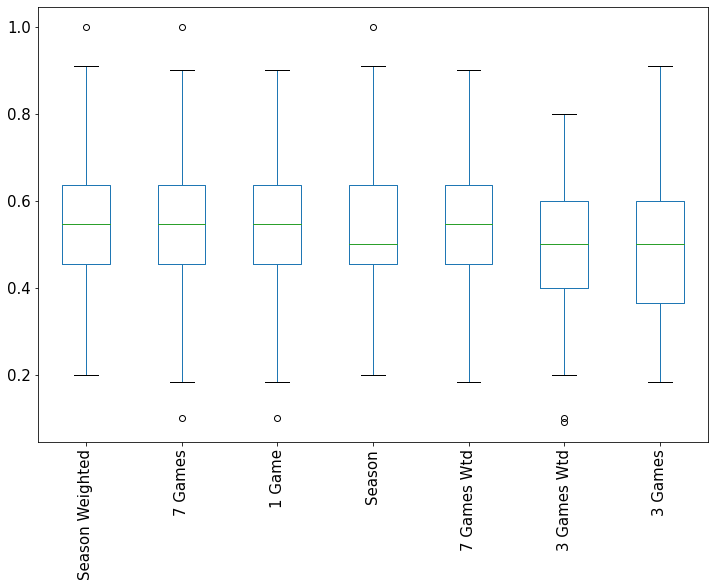

In [54]:
column_dict_no_sent = {
    'preprocessed_no_sent_last_7.csv': '7 Games',
    'preprocessed_no_sent_last_7_wt.csv': '7 Games Wtd',
    'preprocessed_no_sent_last_1.csv': '1 Game',
    'preprocessed_no_sent_last_3.csv': '3 Games',
    'preprocessed_no_sent_last_3_wt.csv': '3 Games Wtd',
    'preprocessed_no_sent_last_ssn.csv': 'Season',
    'preprocessed_no_sent_last_ssn_wt.csv': 'Season Weighted',
}
def get_box_plot(df, col_labels):
    scores = df['scores'].apply(pd.Series).transpose()
    # print(scores.columns)
    scores = scores.rename(columns=col_labels)
    scores.boxplot(rot=90, figsize=(12,8), grid=False, fontsize=15)

get_box_plot(df_no_sent_results, column_dict_no_sent)

In [ ]:
from sklearn.model_selection import GridSearchCV


# def all_datasets(files, random_grid):
#     results = []

#     for file in files:
#         rf = RandomForestClassifier()
#         cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
#         # Random search of parameters, using 3 fold cross validation, 
#         # search across 100 different combinations, and use all available cores
#         rf_random = GridSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1000, cv = 10, verbose=2, random_state=42, n_jobs = -1
#         )# Fit the random search model
#         rf_random.fit(x, y)

#### take best no sentiment dataset and use with sentiment
In this example all last 7 games, both weighted and not since tied


In [ ]:
files_7_games = [f for f in files if 'last_7' in f]
files_test = files_7_games
files_test

#### Get results for test files w. and w.out sentiment

In [ ]:
results_test = all_datasets(files_test)


In [ ]:
df_results_test = pd.DataFrame.from_records(results_test, index='file').sort_values('scores_mean', ascending=False)
df_results_test

In [ ]:
df_res